In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ipywidgets import interact, IntSlider, FloatSlider
import time

### **Unparameterized**

In [3]:
class KDNode:
    def __init__(self, point, left=None, right=None, points=None):
        self.point = point
        self.left = left
        self.right = right
        self.points=points

In [4]:
def build_kd_tree(points, depth=0, leaf_size=40):
    if len(points) <= leaf_size:
        return KDNode(point=None, points=points)
    
    k = len(points[0])
    axis = depth % k
    sorted_points = sorted(points, key=lambda x: x[axis])
    median_idx = len(sorted_points) // 2
    
    return KDNode(
        point=sorted_points[median_idx],
        left=build_kd_tree(sorted_points[:median_idx], depth + 1),
        right=build_kd_tree(sorted_points[median_idx + 1:], depth + 1)
    )

In [5]:
def plot_kd_tree(ax, tree, xmin, xmax, ymin, ymax, depth=0):
    if tree is None:
        return
    
    axis = depth % 2
    if tree.left is not None or tree.right is not None:  # Non-leaf node
        if axis == 0:
            ax.plot([tree.point[0], tree.point[0]], [ymin, ymax], color='black')
            plot_kd_tree(ax, tree.left, xmin, tree.point[0], ymin, ymax, depth + 1)
            plot_kd_tree(ax, tree.right, tree.point[0], xmax, ymin, ymax, depth + 1)
        else:
            ax.plot([xmin, xmax], [tree.point[1], tree.point[1]], color='black')
            plot_kd_tree(ax, tree.left, xmin, xmax, ymin, tree.point[1], depth + 1)
            plot_kd_tree(ax, tree.right, xmin, xmax, tree.point[1], ymax, depth + 1)
    else:  # Leaf node
        points = np.array(tree.points)
        ax.scatter(points[:, 0], points[:, 1], color='red')

In [6]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [7]:
def find_leaf_node(tree, query_point,depth=0):
    if tree is None:
        return None
        
    if tree.left is None:
        if tree.right is None:  # Leaf node
            return tree
        else:
            return find_leaf_node(tree.right, query_point)
    elif tree.right is None:
        if tree.left is None:
            return tree
        else:
            return find_leaf_node(tree.left, query_point)
    else:
        axis = depth % len(query_point)
    if query_point[axis] < tree.point[axis]:
        return find_leaf_node(tree.left, query_point, depth + 1)
    else:
        return find_leaf_node(tree.right, query_point, depth + 1)

In [8]:
def plot_kd_tree_points(ax, tree):
    if tree is None:
        return
    if tree.left is None and tree.right is None:  # Leaf node
        points = np.array(tree.points)
        ax.scatter(points[:, 0], points[:, 1], color='cyan', marker='x')
    else:
        plot_kd_tree_points(ax, tree.left)
        plot_kd_tree_points(ax, tree.right)

In [9]:
def knn_search_within_leaf(points, query_point, k):
    distances = [euclidean_distance(query_point, p) for p in points]
    sorted_indices = np.argsort(distances)
    return [points[i] for i in sorted_indices[:k]]

In [10]:
def plot_nearest_neighbors(ax, nearest_neighbors, query_point):
    for point in nearest_neighbors:
        ax.plot([query_point[0], point[0]], [query_point[1], point[1]], color='blue', linestyle='--')

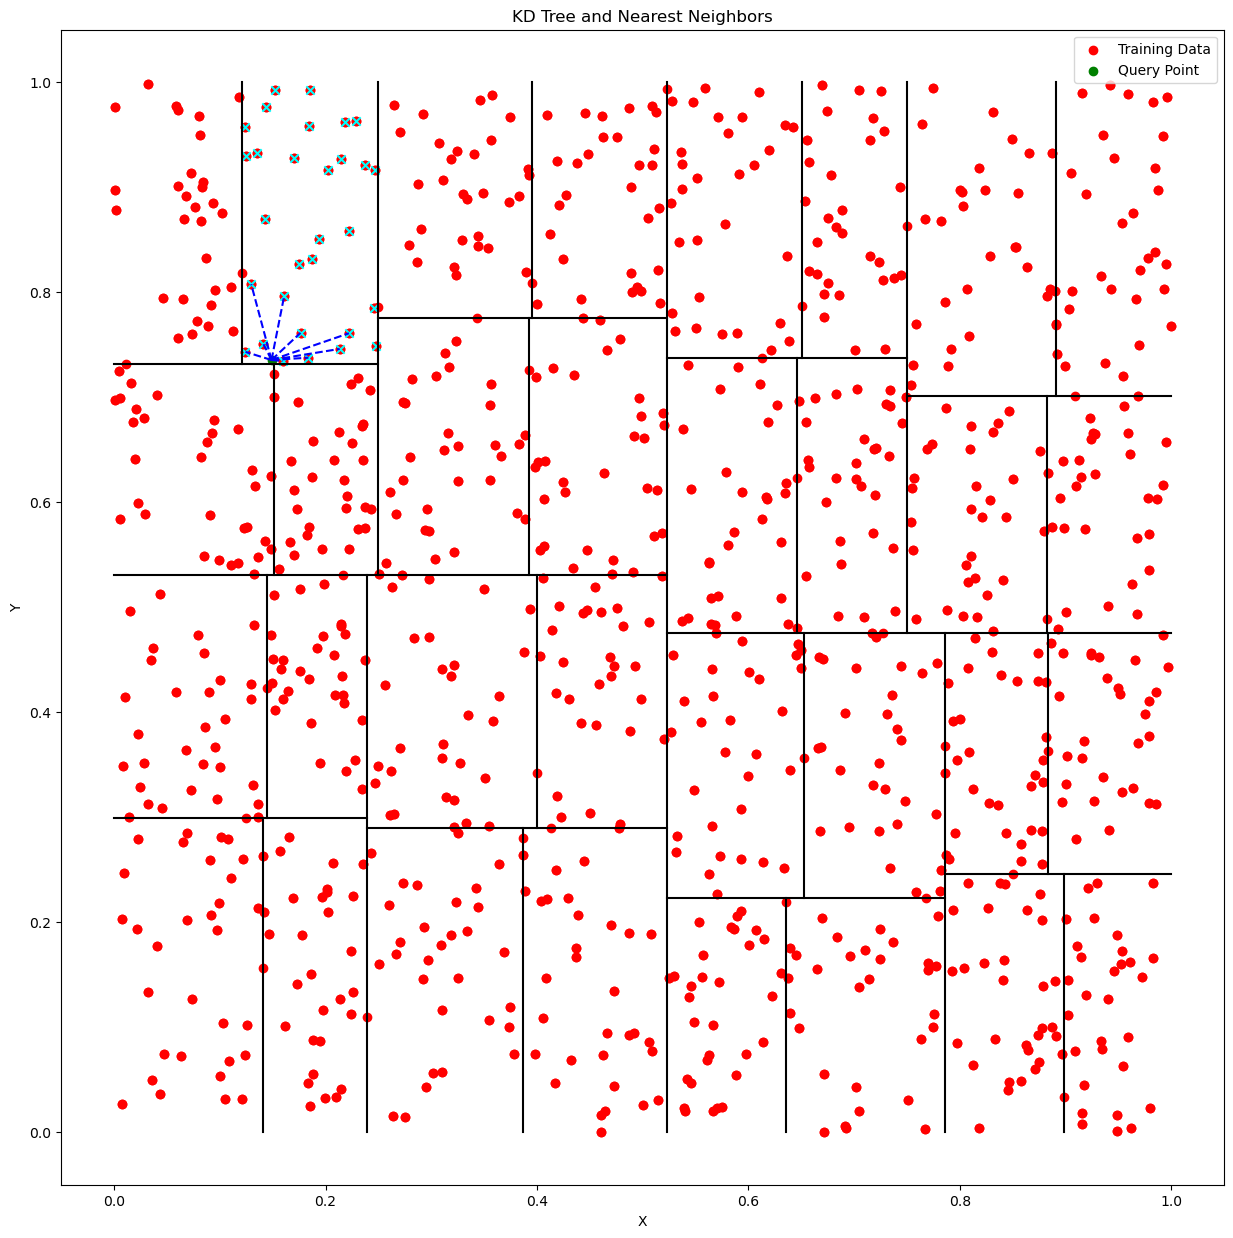

In [11]:
# Generate random data
# np.random.seed(0)
train_data = np.random.rand(1000, 2)
query_point = np.random.rand(2)
k=9
# leaf_size=250

# Build the KD tree
kd_tree = build_kd_tree(train_data)

leaf_node = find_leaf_node(kd_tree, query_point)

k_nearest_neighbors = knn_search_within_leaf(leaf_node.points, query_point, k)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(train_data[:, 0], train_data[:, 1], color='red', label='Training Data')
ax.scatter(query_point[0], query_point[1], color='green', label='Query Point')
plot_kd_tree(ax, kd_tree, 0, 1, 0, 1)
plot_kd_tree_points(ax, leaf_node)  # Plot leaf node points
plot_nearest_neighbors(ax, k_nearest_neighbors, query_point)
ax.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KD Tree and Nearest Neighbors')
plt.show()

### **Parameterized Visualization**

In [13]:
def plot_function(N, D, lf, k):
    query_point = [0.6]*D
    class KDNode:
        def __init__(self, point, left=None, right=None, points=None):
            self.point = point
            self.left = left
            self.right = right
            self.points=points

    def build_kd_tree(points, depth=0, leaf_size=lf):
        if len(points) <= leaf_size:
            return KDNode(point=None, points=points)
        
        k = len(points[0])
        axis = depth % k
        sorted_points = sorted(points, key=lambda x: x[axis])
        median_idx = len(sorted_points) // 2
        
        return KDNode(
            point=sorted_points[median_idx],
            left=build_kd_tree(sorted_points[:median_idx], depth + 1),
            right=build_kd_tree(sorted_points[median_idx + 1:], depth + 1)
        )


    def plot_kd_tree(ax, tree, xmin, xmax, ymin, ymax, depth=0):
        if tree is None:
            return
        
        axis = depth % 2
        if tree.left is not None or tree.right is not None:  # Non-leaf node
            if axis == 0:
                ax.plot([tree.point[0], tree.point[0]], [ymin, ymax], color='blue')
                plot_kd_tree(ax, tree.left, xmin, tree.point[0], ymin, ymax, depth + 1)
                plot_kd_tree(ax, tree.right, tree.point[0], xmax, ymin, ymax, depth + 1)
            else:
                ax.plot([xmin, xmax], [tree.point[1], tree.point[1]], color='blue')
                plot_kd_tree(ax, tree.left, xmin, xmax, ymin, tree.point[1], depth + 1)
                plot_kd_tree(ax, tree.right, xmin, xmax, tree.point[1], ymax, depth + 1)
        else:  # Leaf node
            points = np.array(tree.points)
            ax.scatter(points[:, 0], points[:, 1], color='y')

    def euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)


    def find_leaf_node(tree, query_point,depth=0):
        if tree is None:
            return None
            
        if tree.left is None:
            if tree.right is None:  # Leaf node
                return tree
            else:
                return find_leaf_node(tree.right, query_point)
        elif tree.right is None:
            if tree.left is None:
                return tree
            else:
                return find_leaf_node(tree.left, query_point)
        else:
            axis = depth % len(query_point)
        if query_point[axis] < tree.point[axis]:
            return find_leaf_node(tree.left, query_point, depth + 1)
        else:
            return find_leaf_node(tree.right, query_point, depth + 1)


    def plot_kd_tree_points(ax, tree):
        if tree is None:
            return
        if tree.left is None and tree.right is None:  # Leaf node
            points = np.array(tree.points)
            ax.scatter(points[:, 0], points[:, 1], color='m', marker='o', alpha = 0.8)
        else:
            plot_kd_tree_points(ax, tree.left)
            plot_kd_tree_points(ax, tree.right)
            

    def knn_search_within_leaf(points, query_point, k):
        distances = [euclidean_distance(query_point, p) for p in points]
        sorted_indices = np.argsort(distances)
        return [points[i] for i in sorted_indices[:k]]


    def plot_nearest_neighbors(ax, nearest_neighbors, query_point):
        for point in nearest_neighbors:
            ax.plot([query_point[0], point[0]], [query_point[1], point[1]], color='green', linestyle='--')


    # Generate random data
    train_data = np.random.rand(N, D)

    # Build the KD tree
    start_train = time.time()
    kd_tree = build_kd_tree(train_data)

    leaf_node = find_leaf_node(kd_tree, query_point)
    end_train = time.time()

    k_nearest_neighbors = knn_search_within_leaf(leaf_node.points, query_point, k)
    end_test = time.time()

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.scatter(train_data[:, 0], train_data[:, 1], color='y', label='Training Data')
    ax.scatter(query_point[0], query_point[1], color='green', label='Query Point')
    plot_kd_tree(ax, kd_tree, 0, 1, 0, 1)
    plot_kd_tree_points(ax, leaf_node)  # Plot leaf node points
    plot_nearest_neighbors(ax, k_nearest_neighbors, query_point)
    ax.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KD Tree and Nearest Neighbors')
    plt.show()
    print("Training Time: ", (end_train-start_train)*1000, "Miliseconds")
    print("Testing Time: ", (end_test-end_train)*1000, "Miliseconds")


# Define sliders
N_Slider = IntSlider(min=1, max=10000, step=20, value=500, description='Data Points')
D_Slider = IntSlider(min=2, max=5, step=1, value=2, description='Dimensions')
lf_Slider = IntSlider(min=1, max=500, step=1, value=20, description='Leaf Size')
k_Slider = IntSlider(min=1, max=20, step=1, value=5, description='K')


# Link sliders to plotting function
interact(plot_function, N=N_Slider, D=D_Slider, lf=lf_Slider, k=k_Slider)


interactive(children=(IntSlider(value=500, description='Data Points', max=10000, min=1, step=20), IntSlider(va…

<function __main__.plot_function(N, D, lf, k)>

 $$ \text{Training Time: } O(N \text{log}^2(N)) $$
 $$ \text{Testing Time: } O(\text{log}(N)) $$